In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)

# Combine the data into a single dataset
city_ride_df = pd.merge(city_data_df, ride_data_df,
                                 how='left', on=['city', 'city'])

city_ride_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [4]:
# create dataframes for three city types: urban, suburban, rural
urban = city_ride_df[city_ride_df['type']=='Urban']
suburban = city_ride_df[city_ride_df['type']=='Suburban']
rural = city_ride_df[city_ride_df['type']=='Rural']

urban_fare = urban.groupby(['city']).mean()['fare']
urban_rides = urban.groupby(['city']).count()['ride_id']
urban_drivers_count = urban.groupby(['city']).mean()['driver_count']

suburban_fare = suburban.groupby(['city']).mean()['fare']
suburban_rides = suburban.groupby(['city']).count()['ride_id']
suburban_drivers_count = suburban.groupby(['city']).mean()['driver_count']

rural_fare = rural.groupby(['city']).mean()['fare']
rural_rides = rural.groupby(['city']).count()['ride_id']
rural_drivers_count = rural.groupby(['city']).mean()['driver_count']



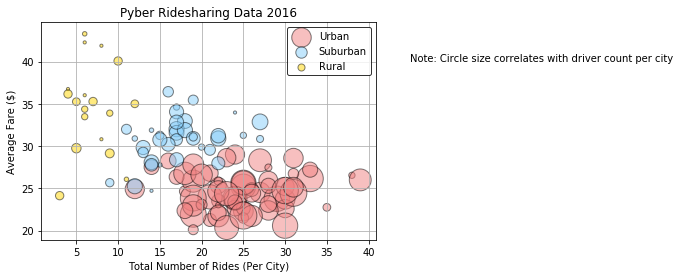

In [6]:
# Build the scatter plots for each city types
plt.scatter(urban_rides, urban_fare, s=urban_drivers_count*10,
            marker ='o', c ="lightcoral", edgecolor='black',linewidths = 1, alpha = 0.5, label="Urban")

plt.scatter(suburban_rides, suburban_fare, s=suburban_drivers_count*10,
            marker ='o', c ="lightskyblue", edgecolor='black',linewidths = 1, alpha = 0.5, label="Suburban")

plt.scatter(rural_rides, rural_fare, s=rural_drivers_count*10,
            marker ='o', c ="gold", edgecolor='black',linewidths = 1, alpha = 0.5, label="Rural")

# Create a legend
plt.legend(loc ='upper right', frameon = True, edgecolor = 'black')

# Incorporate a text label regarding circle size
plt.text(x = 45, y = 40, s = "Note: Circle size correlates with driver count per city")

# Incorporate the other graph properties
plt.title("Pyber Ridesharing Data 2016")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")  
plt.grid(True)

# Save Figure
plt.savefig("../Images/RideSharing.png")

# Show plot
plt.show()

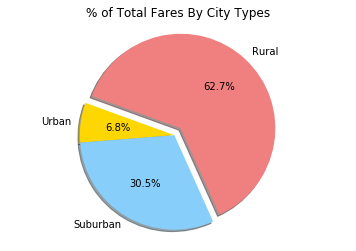

In [45]:
# Calculate Fare Percents
fare_by_city = city_ride_df.groupby(['type'])['fare'].sum()

# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Fares By City Types")
plt.pie(fare_by_city, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save Figure
plt.savefig("../Images/farebycity.png")


In [ ]:
# Show Figure
plt.show()

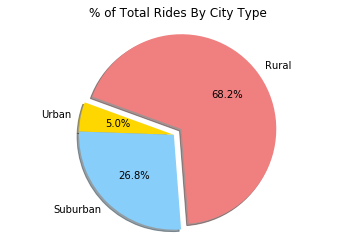

In [46]:
# Calculate Ride Percents
rides_by_city = city_ride_df.groupby(['type'])['ride_id'].sum()

# Build Pie Chart
labels = ["Urban", "Suburban", "Rural"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Rides By City Type")
plt.pie(rides_by_city, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save Figure
plt.savefig("../Images/ridesbycity.png")

In [ ]:
# Show Figure
plt.show()

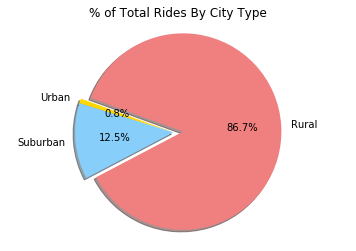

In [52]:
# Calculate Driver Percents
driver_by_city = city_ride_df.groupby(['type'])['driver_count'].sum()

# Build Pie Charts
labels = ["Urban", "Suburban", "Rural"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.title("% of Total Rides By City Type")
plt.pie(driver_by_city, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%",shadow=True, startangle=160)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save Figure
plt.savefig("../Images/driverbycity.png")

In [ ]:
# Show Figure
plt.show()